In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


# Load the data
data = pd.read_csv('turnover_data.csv')

# Perform one-hot encoding on the "Department" and "salary" features
#data = pd.get_dummies(data, columns=["Department", "salary"])

# Convert categorical data to numeric
data['Department'] = data['Department'].astype('category').cat.codes
data['salary'] = data['salary'].astype('category').cat.codes








Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
# Check for missing values
print(data.isnull().sum())

# Convert categorical data to numeric
data['Department'] = data['Department'].astype('category').cat.codes
data['salary'] = data['salary'].astype('category').cat.codes

satisfaction_level       0
last_evaluation          0
number_patients          0
average_montly_hours     0
time_spend_clinic        0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64


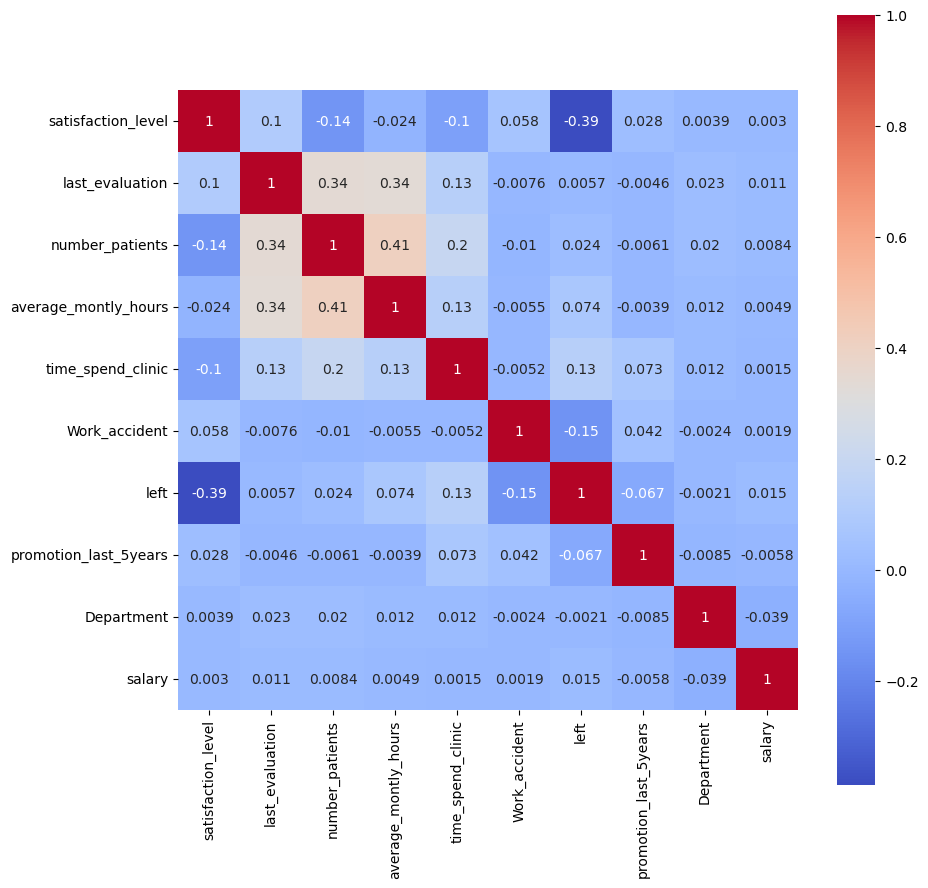

In [3]:
# Check the correlations
correlation = data.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(correlation, annot=True, square=True, cmap='coolwarm')
plt.show()

# Split the data into features and target
X = data.drop(['left'], axis=1)
y = data['left']

In [4]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the model
model = GradientBoostingClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print('Model Accuracy:', accuracy_score(y_test, y_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))

Model Accuracy: 0.978021978021978
Confusion Matrix:
 [[1935   21]
 [  35  557]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99      1956
           1       0.96      0.94      0.95       592

    accuracy                           0.98      2548
   macro avg       0.97      0.97      0.97      2548
weighted avg       0.98      0.98      0.98      2548



In [5]:
# Feature importance
importances = model.feature_importances_
feature_importances = pd.Series(importances, index=X.columns).sort_values(ascending=False)
print('Feature importances:\n', feature_importances)

Feature importances:
 satisfaction_level       0.552303
time_spend_clinic        0.165568
number_patients          0.115150
last_evaluation          0.096490
average_montly_hours     0.068513
Work_accident            0.001079
salary                   0.000856
Department               0.000041
promotion_last_5years    0.000000
dtype: float64


Attributes highly correlated with "left":
time_spend_clinic        0.131007
average_montly_hours     0.074435
number_patients          0.023828
salary                   0.014855
last_evaluation          0.005681
Department              -0.002052
promotion_last_5years   -0.067225
Work_accident           -0.153565
satisfaction_level      -0.387728
Name: left, dtype: float64


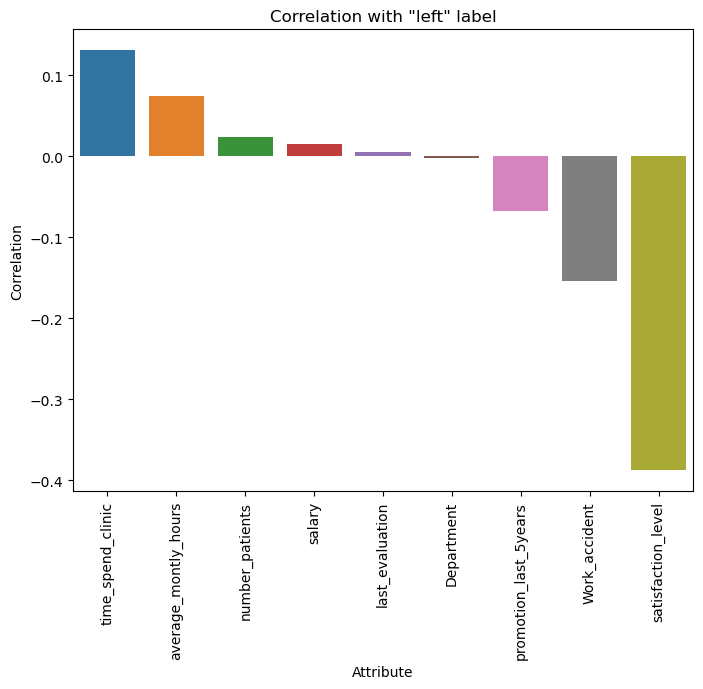

In [6]:
# Calculate correlation between each feature and the 'left' label
correlation_with_left = data.corr()['left'].sort_values(ascending=False)

# Remove the 'left' label from the list, as it will have a correlation of 1 with itself
correlation_with_left = correlation_with_left.drop('left')

# Display the attributes highly correlated with 'left'
print('Attributes highly correlated with "left":')
print(correlation_with_left)

# Plot the correlation values
plt.figure(figsize=(8, 6))
sns.barplot(x=correlation_with_left.index, y=correlation_with_left.values)
plt.xticks(rotation=90)
plt.title('Correlation with "left" label')
plt.xlabel('Attribute')
plt.ylabel('Correlation')
plt.show()
#In this code, we calculate the correlation between each feature and the 'left' label using the corr() method of the DataFrame. We then sort the correlation values in descending order and display the attributes highly correlated with the 'left' label. Finally, we create a bar plot to visualize the correlation values for each attribute with the 'left' label.






In [7]:
# Filter the data to include only rows where 'left' is equal to 1 (employees who left)
employees_left = data[data['left'] == 1]

# Calculate the average satisfaction level of employees who left
average_satisfaction_level = employees_left['satisfaction_level'].mean()

print('Average satisfaction level of employees who left:', average_satisfaction_level)

left_employees_data = data[data['left'] == 1]
Avg_Satisfection_Level_Employee_Leaving = left_employees_data['salary'].mean()

print("Avg_Satisfection_Level_Employee_Leaving_With_Rescpect_to_Salary :", Avg_Satisfection_Level_Employee_Leaving)


Average satisfaction level of employees who left: 0.4377889447236182
Avg_Satisfection_Level_Employee_Leaving_With_Rescpect_to_Salary : 1.3628140703517588


In [8]:
employee_data = {
    'satisfaction_level': 0.6,
    'last_evaluation': 0.8,
    'number_patients': 5,
    'average_montly_hours': 160,
    'time_spend_clinic': 3,
    'Work_accident': 0,
    'promotion_last_5years': 0,
    'Department': 2,  # Assuming '2' corresponds to the 'sales' department based on category codes
    'salary': 1  # Assuming '1' corresponds to 'low' salary based on category codes
}


# Convert the employee data into a DataFrame
employee_df = pd.DataFrame([employee_data])

# Make the prediction
predicted_leave_status = model.predict(employee_df)

# Convert the binary result (0 or 1) to a more human-readable status
if predicted_leave_status[0] == 0:
    leave_status = "Not Leaving"
else:
    leave_status = "Leaving"

# Print the result
print(f"The employee is predicted to be: {leave_status}")


The employee is predicted to be: Not Leaving
